# Spanish Translation A/B Test

## Goal

A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important data scientist responsibility. Especially, data scientists have to make sure that results are reliable, trustworthy, and conclusions can be drawn.
<br>
<br>
Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually analyzing all of them would require lot of time and people. Therefore, it is common practice to look at the typical A/B test analysis steps and try to automate as much as possible. This frees up time for the data scientists to work on more high level topics.
<br>
<br>
In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to design an algorithm to automate some steps.

## Challenge Description

Company XYZ is a worldwide e-commerce site with localized versions of the site.
<br>
<br>
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
<br>
<br>
Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
<br>
<br>
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!
<br>
<br>
You are asked to:
* Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
* Explain why that might be happening. Are the localized translations really worse?
* If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

## Data

"test_table" - general information about the test results.<br>
Columns:
* **user_id** : the id of the user. Unique by user. Can be joined to user id in the other table. For each user, we just check whether conversion happens the first time they land on the site since the test started.
* **date** : when they came to the site for the first time since the test started
* **source** : marketing channel: Ads, SEO, Direct . Direct means everything except for ads and SEO. Such as directly typing site URL on the browser, downloading the app w/o coming from SEO or Ads, referral friend, etc.
* **device** : device used by the user. It can be mobile or web 
* **browser_language** : in browser or app settings, the language chosen by the user. It can be EN, ES, Other (Other means any language except for English and Spanish) 
* **ads_channel** : if marketing channel is ads, this is the site where the ad was displayed. It can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this field is NA
* **browser** : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App, Safari, Opera
* **conversion** : whether the user converted (1) or not (0). This is our label. A test is considered successful if it increases the proportion of users who convert.
* **test** : users are randomly split into test (1) and control (0). Test users see the new translation and control the old one. For Spain-based users, this is obviously always 0 since there is no change there.

"user_table" - some information about the user<br>
Columns:
* **user_id** : the id of the user. It can be joined to user id in the other table
* **sex** : user sex: Male or Female
* **age** : user age (self-reported)
* **country** : user country based on ip address

===================================================================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir('F:\Data_Science\Product_sense\DS take home challenges\Dataset\Translation_Test')

In [4]:
user_table = pd.read_csv('user_table.csv')
test_table = pd.read_csv('test_table.csv')

### Basic info 

In [5]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
user_table.shape

(452867, 4)

In [8]:
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [9]:
test_table.shape

(453321, 9)

In [11]:
print('we have {} data missing in the user table'.format(test_table.shape[0] - user_table.shape[0])) 

we have 454 data missing in the user table


In [14]:
# merge two tables
data = pd.merge(user_table, test_table, how='right')     # we don't use data in test_table
data

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20.0,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27.0,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23.0,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27.0,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20.0,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
453316,490883,NaN,NaN,NaN,2015-12-01,Direct,Mobile,EN,NaN,Android_App,0,1
453317,741971,NaN,NaN,NaN,2015-11-30,SEO,Web,ES,NaN,Chrome,0,1
453318,722387,NaN,NaN,NaN,2015-11-30,SEO,Web,ES,NaN,FireFox,0,1
453319,752632,NaN,NaN,NaN,2015-12-04,Ads,Web,ES,Google,IE,0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 65.0+ MB


In [26]:
data.describe()

,user_id,age,conversion,test
count,453321.000000,452867.000000,453321.000000,453321.000000
mean,499937.514728,27.130740,0.049579,0.476446
std,288665.193436,6.776678,0.217073,0.499445
min,1.000000,18.000000,0.000000,0.000000
25%,249816.000000,22.000000,0.000000,0.000000
50%,500019.000000,26.000000,0.000000,0.000000
75%,749522.000000,31.000000,0.000000,1.000000
max,1000000.000000,70.000000,1.000000,1.000000


### A/B Testing

In [36]:
# First check whether Spain converts better than other countries
groupby_country = data[data['test'] == 0][['country','conversion']].groupby('country').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values(by = 'conversion', ascending=False)

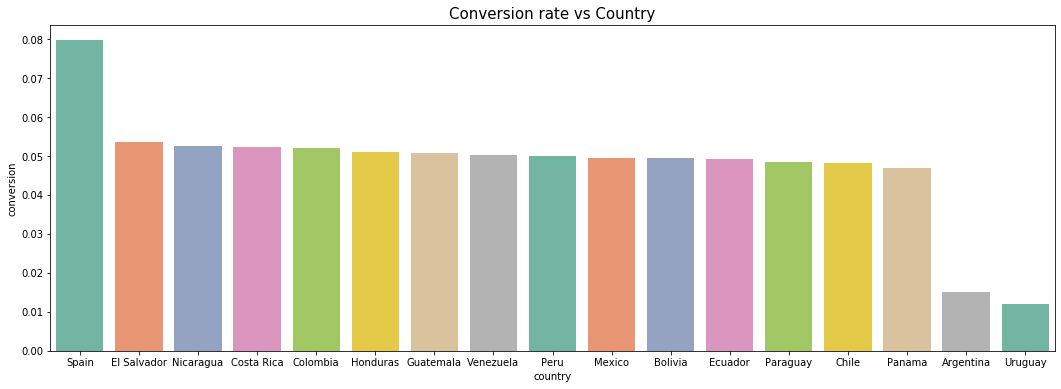

In [45]:
plt.figure(figsize=(18, 6))
sns.barplot(x = 'country', y = 'conversion', data = groupby_country, palette='Set2')
plt.title('Conversion rate vs Country', fontsize = 15)
plt.show()

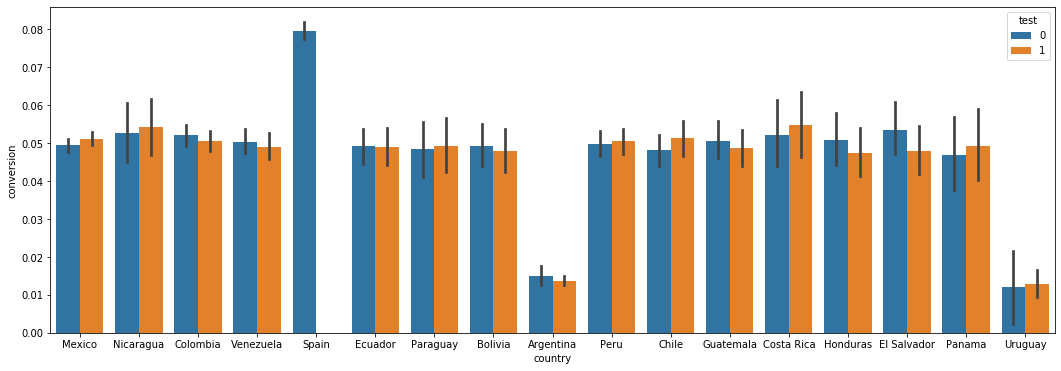

In [47]:
# check conversion rate between test and control groups
plt.figure(figsize=(18, 6))
sns.barplot(x = 'country', y = 'conversion', hue = 'test', data = data)
plt.show()

Basically, the number of test-control groups are 1:1（test/control
split is ~50/50）

In [51]:
# A/B test
# #nothing changed in Spain, so no point in keeping those users
test_data = data[data['country'] != 'Spain']
test_val = test_data[test_data['test'] == 1]['conversion'].values   # values：提取出conversion，不带index
cont_val = test_data[test_data['test'] == 0]['conversion'].values

print(test_val.mean(), cont_val.mean())

0.043424713982118966 0.04833042316066309


the convert rate in control group is 4.8% while the convert rate in test group is 4.3%

In [56]:
from scipy.stats import ttest_ind

In [57]:
ttest_ind(test_val, cont_val, equal_var = False)

Ttest_indResult(statistic=-7.393937412134479, pvalue=1.428299475405547e-13)

If the test is accurate, from 4.8% to 4.3% is a 10% drop, which is too dramatic to be true

The most likely reason for weird A/B test results are:
1. We didn’t collect **enough data**.
2. Some **bias** has been introduced in the experiment so that test/control people are not really
random

### Analysis

To find the bias: Likely, there is for some reason **some segment of users are more likely to end up in test or in control**, this segment had a significantly above/below conversion rate and this affected the overall results\
--------- find out **the relationship between features and test**

In [62]:
test_data.head()    # spain users removed

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20.0,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27.0,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23.0,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27.0,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
5,62371,M,29.0,Ecuador,2015-12-02,Direct,Mobile,ES,NaN,Iphone_App,0,0


In [90]:
def visualization(feature):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))
    sns.countplot(x = feature, hue='test', data = test_data, ax = ax[0])
    ax[0].set_title('Count of {} in test/control group'.format(feature))

    sns.barplot(x = feature, y = 'conversion', hue='test', data = test_data, ax = ax[1])
    ax[1].set_title('Conversion rate vs {} in test/control group'.format(feature))
    plt.show()

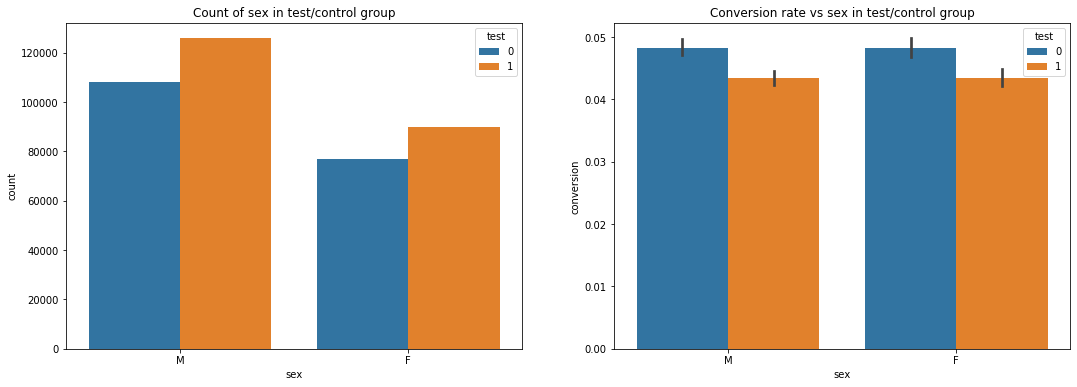

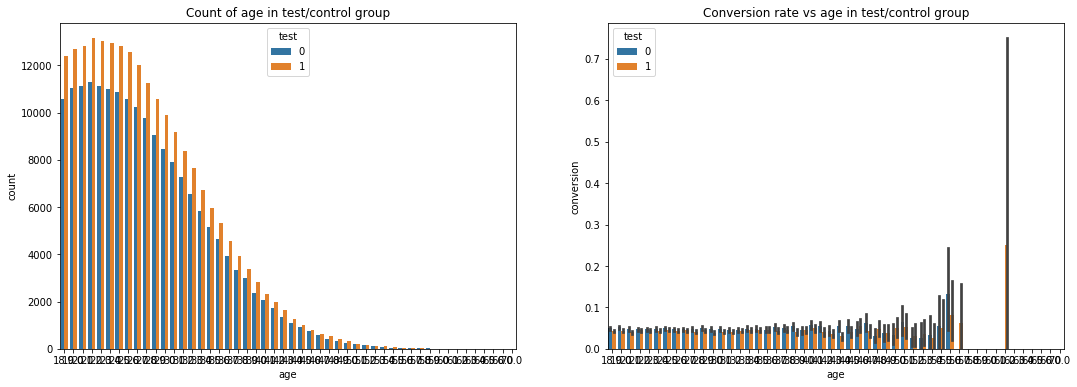

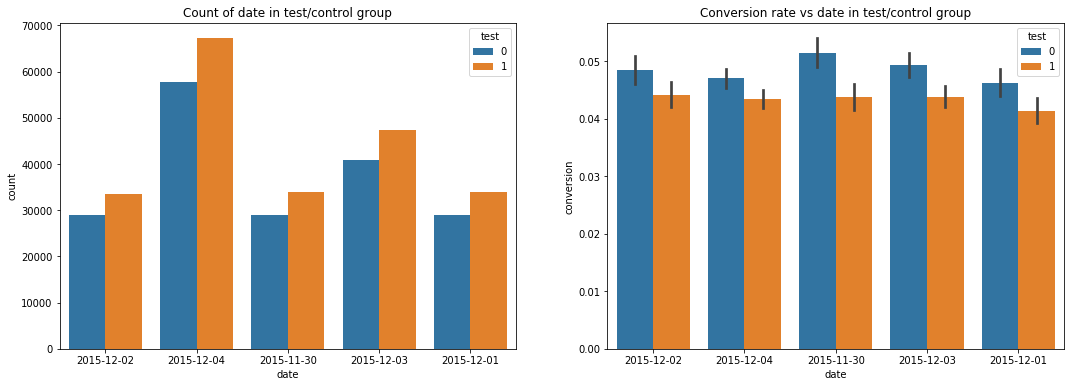

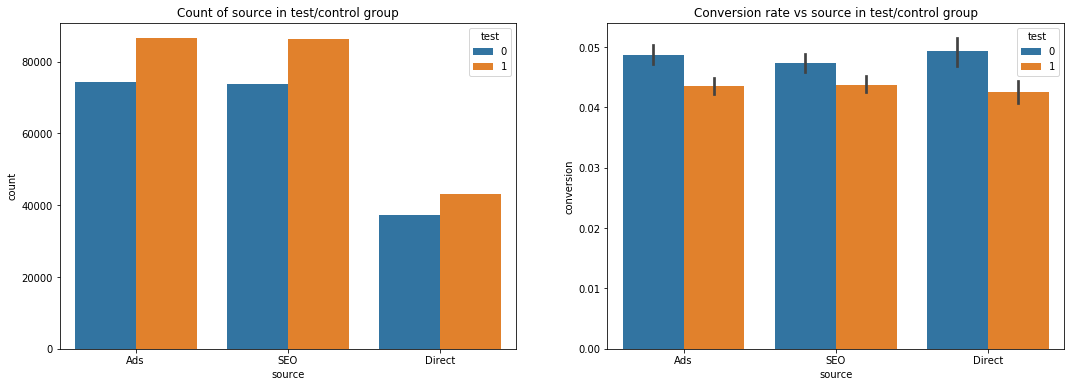

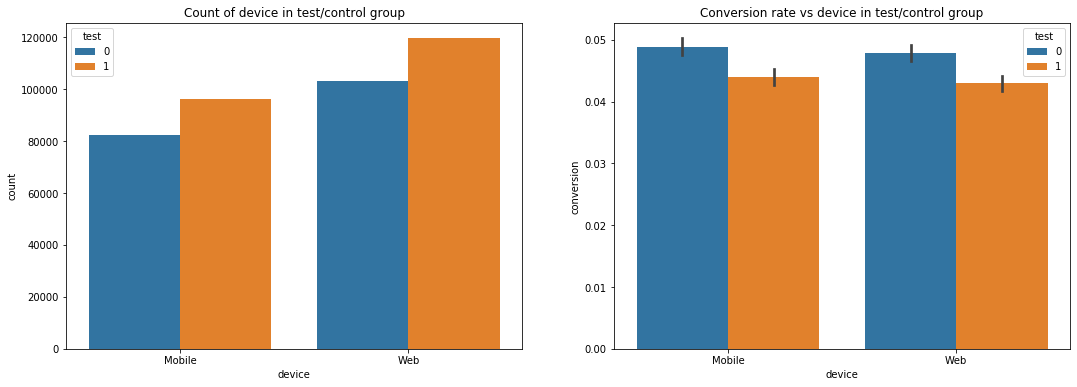

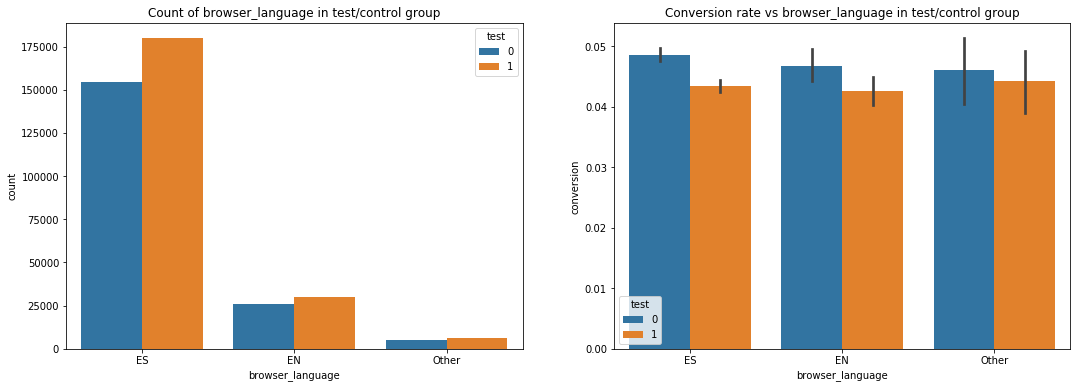

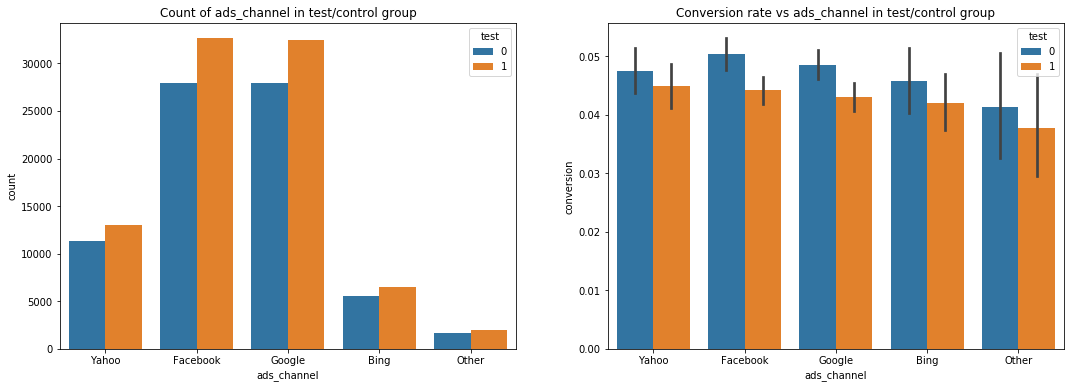

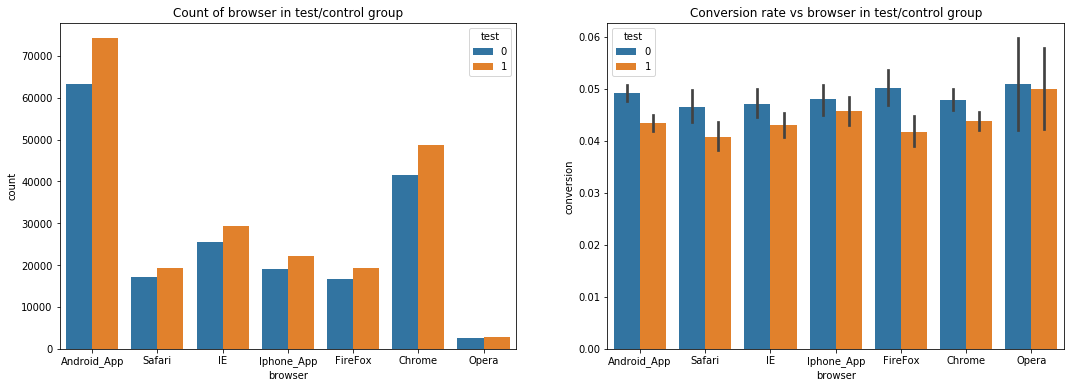

In [93]:
for i in ['sex','age','date','source','device','browser_language','ads_channel','browser']:
    visualization(i)

for the date:
    1. Test has constantly been worse than control and there is relatively little variance across days. That probably means that we do have enough data, but there was some bias in the experiment set up.
    2. On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.

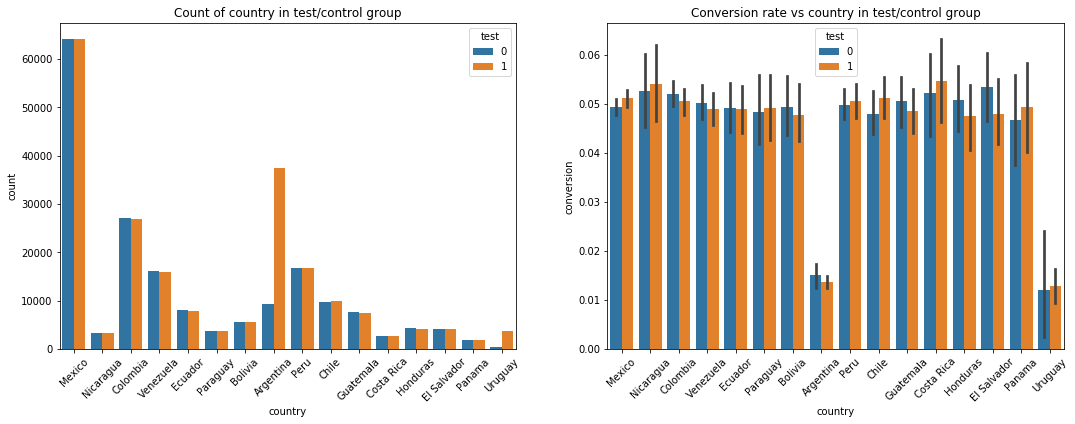

In [88]:
# visualization of country
groupby_sex = data[['country','test', 'conversion']].groupby('country').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))
sns.countplot(x = 'country', hue='test', data = test_data, ax = ax[0])
ax[0].set_title('Count of country in test/control group')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)   # rotate x labels 45 degree
                   
sns.barplot(x = 'country', y = 'conversion', hue='test', data = test_data, ax = ax[1])
# will automatically compute mean value?
ax[1].set_title('Conversion rate vs country in test/control group')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.show()

People from Argentina and Uruguay are much more likely to be distributed to test groups 

Another way to check this: build a decision tree where the variables are the user
dimensions and the outcome variable is whether the user is in test or control. If the tree splits, it means
that for given values of that variable you are more likely to end up in test or control. But this should be
impossible! Therefore, if the randomization worked, the tree should not split at all (or at least not be able to
separate the two classes well)

In [116]:
# with fixed country, let's see whether there is difference between test/control groups
# get all the country name that is not null
country_list = [i for i in test_data['country'].unique() if i is not np.nan]

In [127]:
for i in country_list:
    cont = test_data[(test_data['country'] == i) & (test_data['test'] == 0)]['conversion'].values
    test = test_data[(test_data['country'] == i) & (test_data['test'] == 1)]['conversion'].values
    control_mean = cont.mean()
    test_mean = test.mean()
    p_value = ttest_ind(test,cont, equal_var=False)[1]
    print('{0: <10s} {1:<15s} {2:<15s} {3:<15s}'.format('Country', 
                                                       'Control rate',
                                                       'Test rate',
                                                       'p_value'))
    print('{0:<10s} {1:<15f} {2:<15f} {3:<15f}'.format(i, control_mean, test_mean, p_value))

Country    Control rate    Test rate       p_value        
Mexico     0.049495        0.051186        0.165544       
Country    Control rate    Test rate       p_value        
Nicaragua  0.052647        0.054177        0.780400       
Country    Control rate    Test rate       p_value        
Colombia   0.052089        0.050571        0.423719       
Country    Control rate    Test rate       p_value        
Venezuela  0.050344        0.048978        0.573702       
Country    Control rate    Test rate       p_value        
Ecuador    0.049154        0.048988        0.961512       
Country    Control rate    Test rate       p_value        
Paraguay   0.048493        0.049229        0.883697       
Country    Control rate    Test rate       p_value        
Bolivia    0.049369        0.047901        0.718885       
Country    Control rate    Test rate       p_value        
Argentina  0.015071        0.013725        0.335147       
Country    Control rate    Test rate       p_value      

With fixed country, the p-value changes from 1.428e-13 to values > 0.05, so we fail to reject the null hypothesis

After we control for country, the test clearly appears non significant. Not a great success given that the
goal was to improve conversion rate, but at least we know that a localized translation didn’t make things
worse!